In [833]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules

ModuleNotFoundError: No module named 'mlxtend'

DATA UNDERSTANDING

In [811]:
data = pd.read_csv("data_transaksi_petshop.csv")
data

,ID Transaksi,Tanggal Transaksi,Nama Barang,Kategori,Jumlah Terjual,Harga Satuan,Total Harga,Metode Pembayaran
0,TX-20240404-001,2024-04-04,"Frontline Plus Flea & Tick Treatment, Life Cat...","Obat Hewan, Makanan","3, 10","13000, 4500","39000, 45000",Transfer
1,TX-20240614-001,2024-06-14,"Rogz Utility Dog Leash - Medium, Life Cat Can ...","Aksesoris, Makanan, Makanan","3, 8, 8","25000, 30000, 13000","75000, 240000, 104000",Tunai
2,TX-20240328-001,2024-03-28,"Trixie Cat Laser Pointer, Life Cat Can - Kitte...","Mainan, Makanan","9, 9","30000, 20000","270000, 180000",QRIS
3,TX-20240309-001,2024-03-09,"Beaphar Ear Cleaner for Dogs & Cats, Life Cat ...","Obat Hewan, Makanan, Mainan","1, 8, 7","25000, 13000, 20000","25000, 104000, 140000",QRIS
4,TX-20240430-001,2024-04-30,"Drontal Cat Dewormer, Kong Classic Dog Chew To...","Obat Hewan, Mainan, Makanan","6, 5, 6","12000, 20000, 12000","72000, 100000, 72000",Transfer
...,...,...,...,...,...,...,...,...
1346,TX-20240814-005,2024-08-14,"Life Cat Tofu - Mango, Life Cat Pouch - Salmon...","Makanan, Makanan, Mainan","2, 7, 9","30000, 13000, 20000","60000, 91000, 180000",QRIS
1347,TX-20240417-002,2024-04-17,Nutri-Vet Multivitamin Chewable,Obat Hewan,8,20000,160000,QRIS
1348,TX-20240820-006,2024-08-20,Life Cat Pouch - Kitten Salmon,Makanan,7,12000,84000,Tunai
1349,TX-20240703-002,2024-07-03,"Life Cat Pouch Dus, Life Cat Pouch - Kitten Sa...","Makanan, Makanan","9, 4","13000, 4500","117000, 18000",Transfer


In [812]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID Transaksi       1351 non-null   object
 1   Tanggal Transaksi  1351 non-null   object
 2   Nama Barang        1351 non-null   object
 3   Kategori           1351 non-null   object
 4   Jumlah Terjual     1351 non-null   object
 5   Harga Satuan       1351 non-null   object
 6   Total Harga        1351 non-null   object
 7   Metode Pembayaran  1351 non-null   object
dtypes: object(8)
memory usage: 84.6+ KB


In [813]:
data.describe()

,ID Transaksi,Tanggal Transaksi,Nama Barang,Kategori,Jumlah Terjual,Harga Satuan,Total Harga,Metode Pembayaran
count,1351,1351,1351,1351,1351,1351,1351,1351
unique,1351,340,783,76,483,237,916,3
top,TX-20240731-005,2024-09-01,Life Cat Tofu - Mango,Makanan,8,12000,60000,QRIS
freq,1,11,29,237,61,88,27,476


In [814]:
data.duplicated().sum()

np.int64(0)

In [815]:
# # Mendeteksi outlier menggunakan rentang interkuartil (IQR) untuk kolom numerik
# def plot_outliers(column_name, title):
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x=data[column_name], color='skyblue')
#     plt.title(title, fontsize=14)
#     plt.xlabel(column_name, fontsize=12)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

# plot_outliers('Jumlah Terjual', 'Outliers in Jumlah Terjual')
# plot_outliers('Harga Satuan', 'Outliers in Harga Satuan')
# plot_outliers('Total Harga', 'Outliers in Total Harga')


In [816]:
# Memisahkan kolom multivalue
# Kolom-kolom ini berisi beberapa nilai yang dipisahkan dengan koma. Data dipisahkan menjadi daftar untuk eksplorasi lebih lanjut.
data['Jumlah Terjual'] = data['Jumlah Terjual'].str.split(", ")
data['Harga Satuan'] = data['Harga Satuan'].str.split(", ")
data['Total Harga'] = data['Total Harga'].str.split(", ")

In [817]:
# Kolom tanggal diubah menjadi format datetime agar dapat digunakan untuk analisis berbasis waktu.
data['Tanggal Transaksi'] = pd.to_datetime(data['Tanggal Transaksi'], errors='coerce')

# Kolom tambahan dibuat untuk menganalisis tren penjualan bulanan.
data['Month'] = data['Tanggal Transaksi'].dt.to_period('M')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID Transaksi       1351 non-null   object        
 1   Tanggal Transaksi  1351 non-null   datetime64[ns]
 2   Nama Barang        1351 non-null   object        
 3   Kategori           1351 non-null   object        
 4   Jumlah Terjual     1351 non-null   object        
 5   Harga Satuan       1351 non-null   object        
 6   Total Harga        1351 non-null   object        
 7   Metode Pembayaran  1351 non-null   object        
 8   Month              1351 non-null   period[M]     
dtypes: datetime64[ns](1), object(7), period[M](1)
memory usage: 95.1+ KB


In [818]:
# # Ekspansi Data Multivalue
# data_exploded = data.explode('Total Harga')
# # Nilai harga dijadikan numerik agar dapat digunakan untuk analisis kuantitatif.
# data_exploded['Total Harga'] = pd.to_numeric(data_exploded['Total Harga'], errors='coerce')


# Exploding multivalued columns
data_exploded = data.explode('Jumlah Terjual').explode('Harga Satuan').explode('Total Harga')

# Convert numeric columns to appropriate types
data_exploded['Jumlah Terjual'] = pd.to_numeric(data_exploded['Jumlah Terjual'], errors='coerce')
data_exploded['Harga Satuan'] = pd.to_numeric(data_exploded['Harga Satuan'], errors='coerce')
data_exploded['Total Harga'] = pd.to_numeric(data_exploded['Total Harga'], errors='coerce')

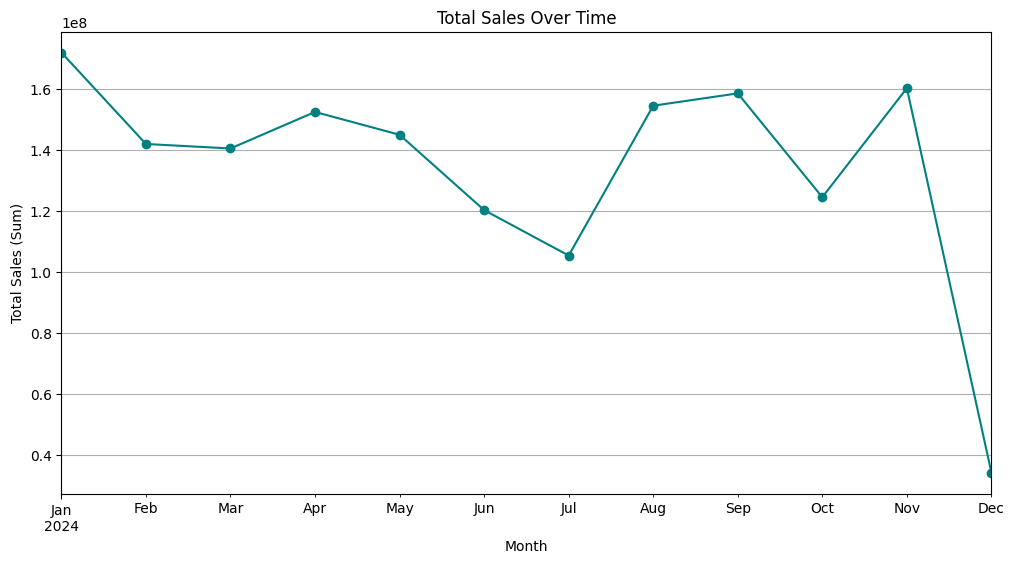

In [819]:
# Eksplorasi Data

# Mengidentifikasi pola musiman atau tren waktu dalam penjualan.
monthly_sales = data_exploded.groupby('Month')['Total Harga'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', title='Total Sales Over Time', color='teal')
plt.xlabel('Month')
plt.ylabel('Total Sales (Sum)')
plt.grid(True)
plt.show()

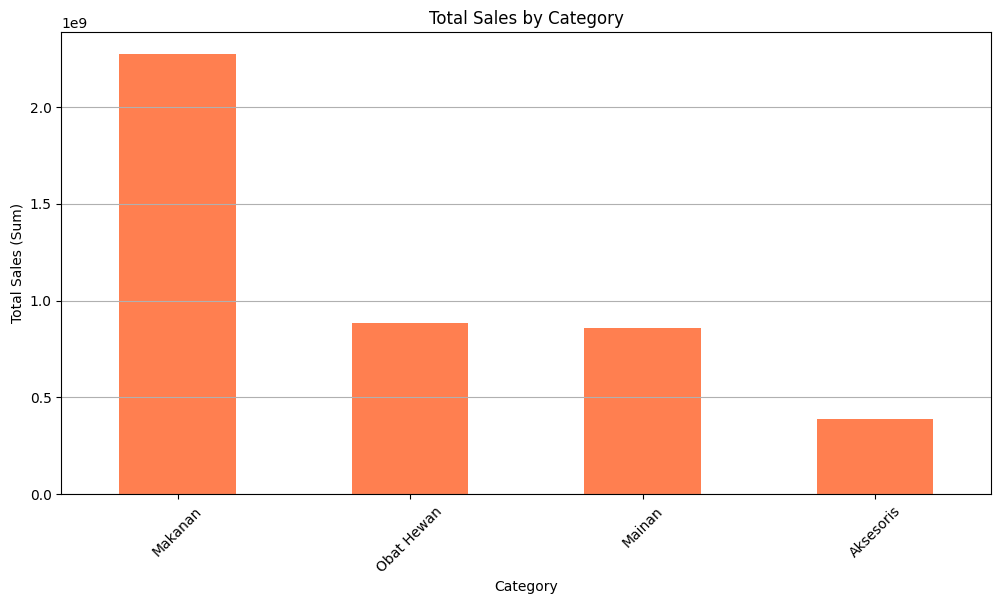

In [820]:
# Data kategori dipisahkan, lalu dihitung total penjualan per kategori.
data_exploded['Kategori'] = data_exploded['Kategori'].str.split(", ")
data_exploded = data_exploded.explode('Kategori')
category_sales = data_exploded.groupby('Kategori')['Total Harga'].sum().sort_values(ascending=False)

# Mengetahui kategori produk dengan penjualan tertinggi.
plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='coral', title='Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (Sum)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

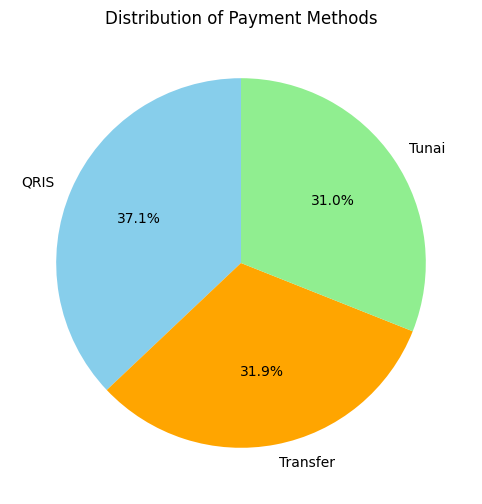

In [821]:
# Mengetahui preferensi metode pembayaran pelanggan.
payment_method_counts = data_exploded['Metode Pembayaran'].value_counts()

plt.figure(figsize=(8, 6))
payment_method_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

In [822]:
# Verifying data quality
# Check for missing values
print(data_exploded.isnull().sum())

ID Transaksi         0
Tanggal Transaksi    0
Nama Barang          0
Kategori             0
Jumlah Terjual       0
Harga Satuan         0
Total Harga          0
Metode Pembayaran    0
Month                0
dtype: int64


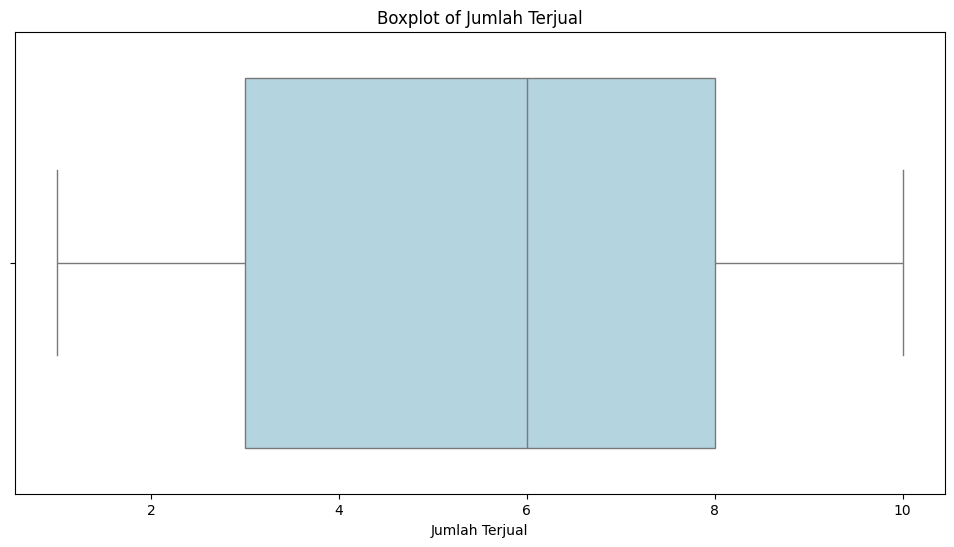

In [823]:
# Detecting and evaluating outliers
# Boxplot for "Jumlah Terjual"
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_exploded, x='Jumlah Terjual', color='lightblue')
plt.title('Boxplot of Jumlah Terjual')
plt.show()

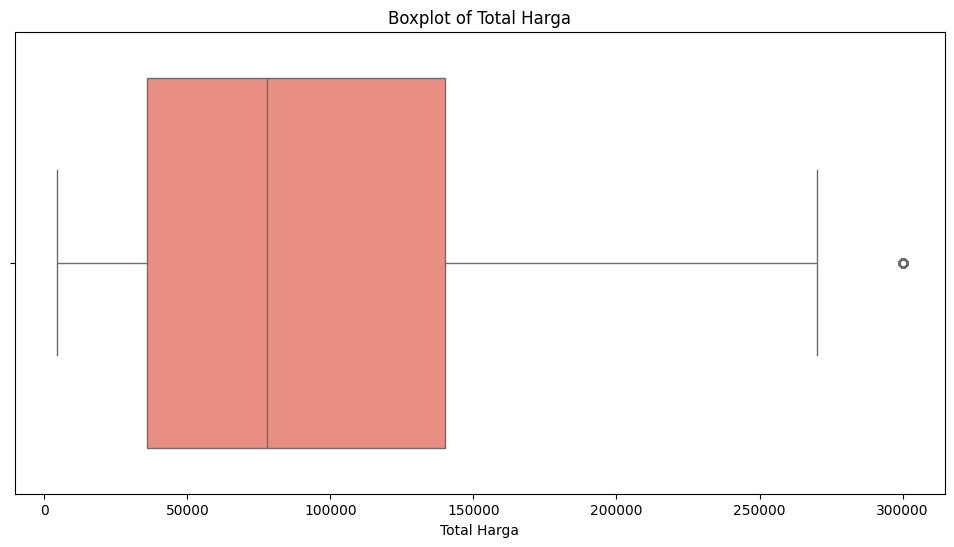

In [824]:
# Boxplot for "Total Harga"
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_exploded, x='Total Harga', color='salmon')
plt.title('Boxplot of Total Harga')
plt.show()

Setelah langkah-langkah di atas:
1. Tren Penjualan Bulanan: Mengidentifikasi kapan penjualan tertinggi atau terendah terjadi.
2. Kategori Produk Populer: Menentukan produk mana yang harus diprioritaskan di etalase.
3. Preferensi Pembayaran: Membantu menyesuaikan metode pembayaran yang ditawarkan petshop.

DATA PREPARATION

In [825]:
# Step 1: Koleksi Data Lanjutan
# Add columns for Day of Week and Month
data['Day of Week'] = data['Tanggal Transaksi'].dt.day_name()
data['Month'] = data['Tanggal Transaksi'].dt.month_name()

# Analyze transaction frequency by day of the week
day_sales = data.groupby('Day of Week')['Total Harga'].sum().sort_values(ascending=False)

# Analyze transaction frequency by month
month_sales = data.groupby('Month')['Total Harga'].sum().sort_values(ascending=False)

In [826]:
# Step 2: Penilaian Kualitas Data

# Validate numerical columns (e.g., negative or invalid values)
data['Jumlah Terjual'] = pd.to_numeric(data['Jumlah Terjual'], errors='coerce')
data['Total Harga'] = pd.to_numeric(data['Total Harga'], errors='coerce')

# invalid_jumlah_terjual = data[data['Jumlah Terjual'] < 0]
# invalid_total_harga = data[data['Total Harga'] < 0]


In [827]:
# Step 3: Konsolidasi dan Pembersihan

# Replace invalid values with NaN and handle missing values
# data['Jumlah Terjual'] = data['Jumlah Terjual'].apply(lambda x: x if x >= 0 else None)
# data['Total Harga'] = data['Total Harga'].apply(lambda x: x if x >= 0 else None)

# Fill missing values with median
# data['Jumlah Terjual'].fillna(data['Jumlah Terjual'].median(), inplace=True)
# data['Total Harga'].fillna(data['Total Harga'].median(), inplace=True)

In [828]:
# Step 4: Pemilihan Data (Feature Selection)
# Selecting relevant columns for further analysis
selected_features = data[['Tanggal Transaksi', 'Kategori', 'Jumlah Terjual', 'Total Harga', 'Day of Week', 'Month']]


In [829]:
# Display results for each step
# Tangani nilai NaN
# data_filled = data.fillna({'Jumlah Terjual': 0, 'Total Harga': 0})

# # Perbaiki perhitungan Total Harga jika diperlukan
# data_filled['Total Harga'] = data_filled['Jumlah Terjual'] * data_filled['Harga Satuan']

# Periksa ulang data yang bersih
# print("Invalid Jumlah Terjual Entries:\n", invalid_jumlah_terjual)
# print("Invalid Total Harga Entries:\n", invalid_total_harga)
print("Selected Features Sample:\n", selected_features.head())

Selected Features Sample:
   Tanggal Transaksi                     Kategori  Jumlah Terjual  Total Harga  \
0        2024-04-04          Obat Hewan, Makanan             NaN          NaN   
1        2024-06-14  Aksesoris, Makanan, Makanan             NaN          NaN   
2        2024-03-28              Mainan, Makanan             NaN          NaN   
3        2024-03-09  Obat Hewan, Makanan, Mainan             NaN          NaN   
4        2024-04-30  Obat Hewan, Mainan, Makanan             NaN          NaN   

  Day of Week  Month  
0    Thursday  April  
1      Friday   June  
2    Thursday  March  
3    Saturday  March  
4     Tuesday  April  


In [831]:
# 2. Normalisasi Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

ValueError: could not convert string to float: 'TX-20240404-001'

In [766]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data_scaled)

# Visualisasi hasil clustering
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_25536\2210925914.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numerical.fillna(data_numerical.mean(), inplace=True)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [767]:
# 4. Pilih k dan Bangun Model KMeans
optimal_k = 3  # Misalnya kita memilih 3 berdasarkan grafik elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# 5. Evaluasi dengan Silhouette Score
sil_score = silhouette_score(data_scaled, data['Cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

In [ ]:
# 6. Visualisasi Hasil Clustering
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Jumlah Terjual'], cluster_data['Total Harga'], label=f'Cluster {cluster}')

plt.title('KMeans Clustering')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Total Harga')
plt.legend()
plt.grid(True)
plt.show()